In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

adata_one_sample = sc.read("FGW_plots_bone_marrow_results_one_sample.h5ad")
adata_cond_mean = sc.read("FGW_plots_bone_marrow_results_cond_mean.h5ad")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata_one_sample.obsm

AxisArrays with keys: ATAC_lsi_full, ATAC_lsi_red, GEX_X_pca, X_translated_0, X_translated_1, X_translated_2, X_umap, emb, emb_fused, emb_q, geneactivity_scvi

In [4]:
np.random.seed(0)
random_indices=np.random.permutation(list(range(adata_one_sample.shape[0])))

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

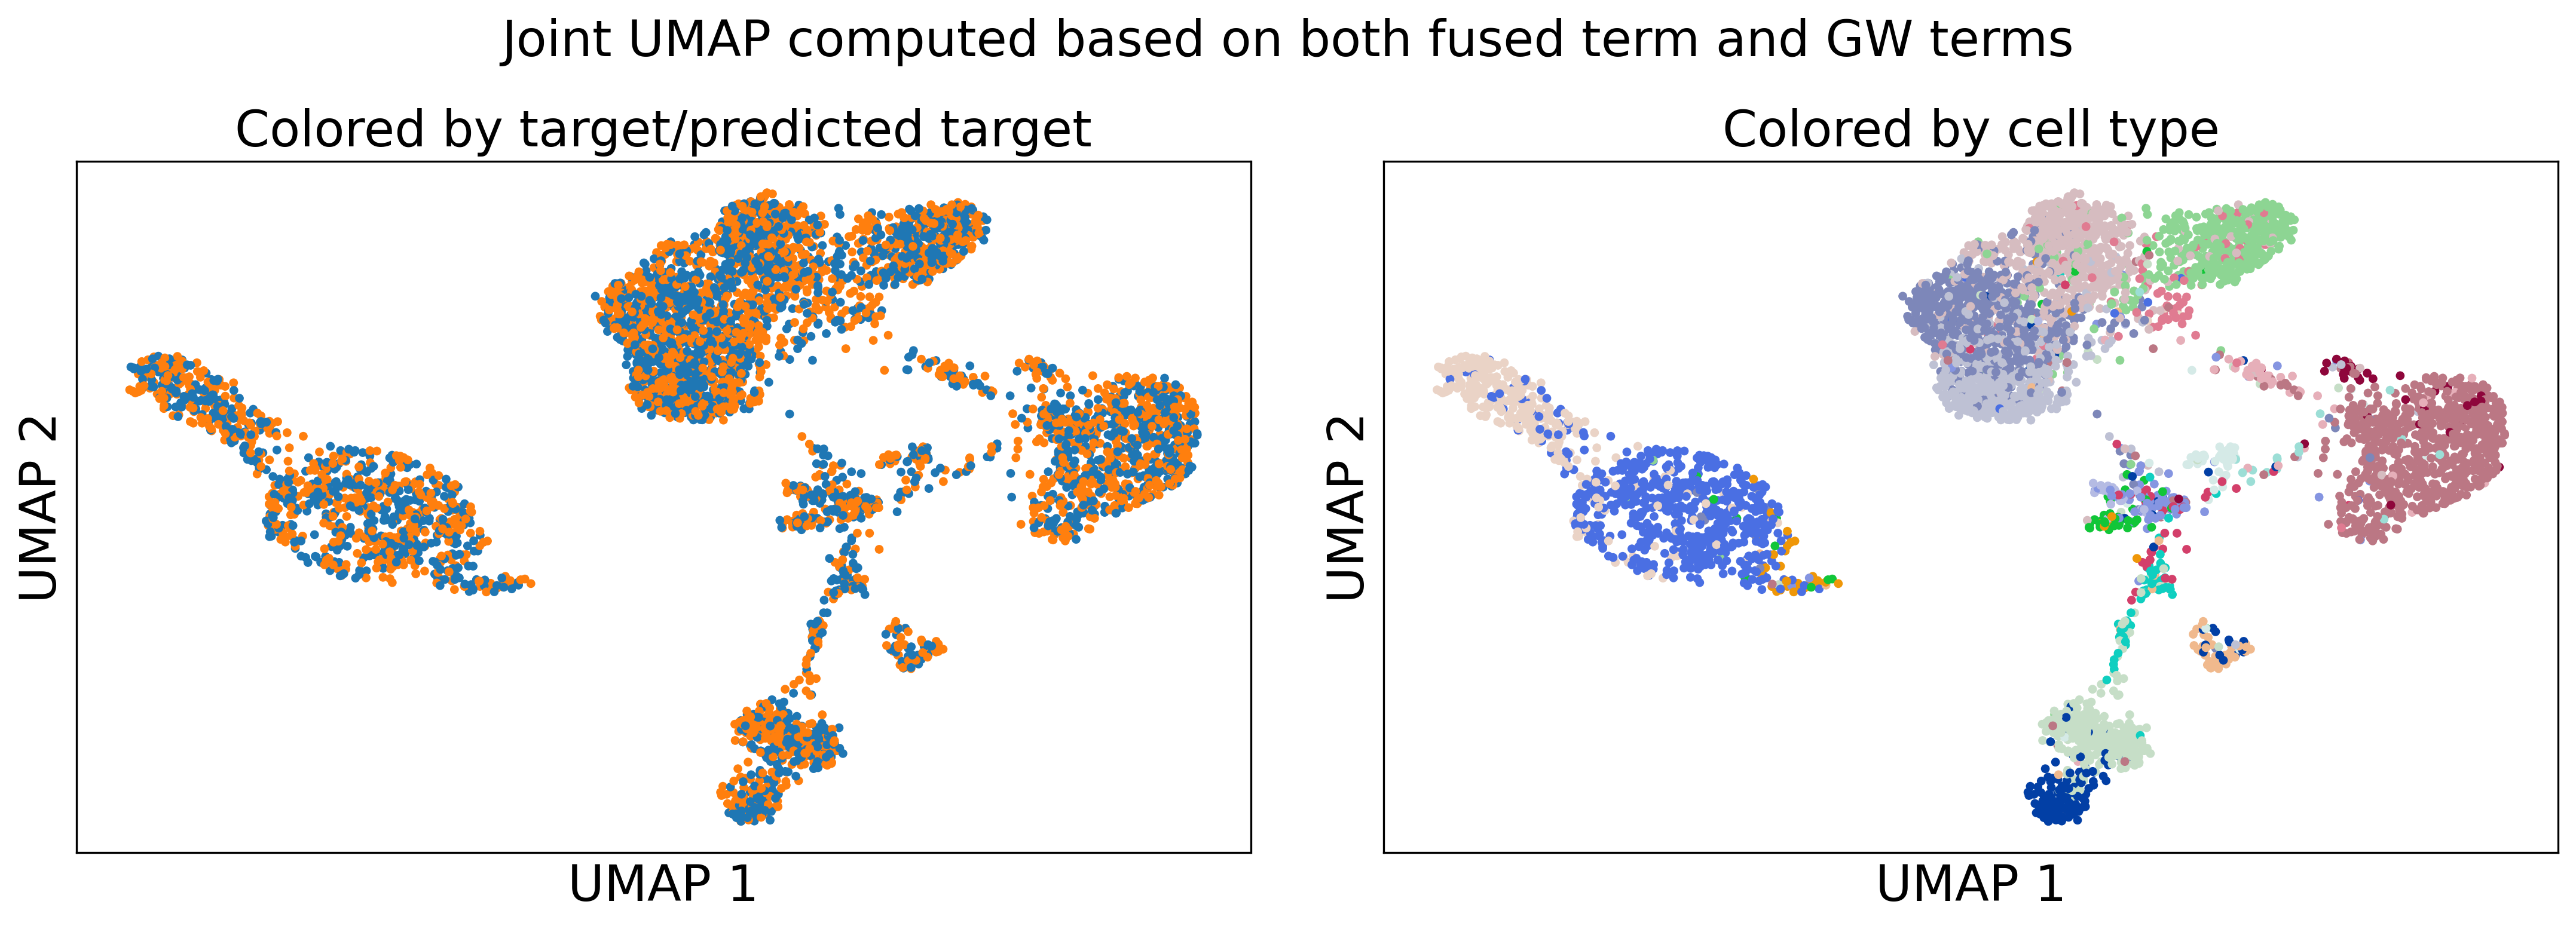

In [5]:
np.random.seed(0)
random_indices=np.random.permutation(list(range(adata_one_sample.shape[0])))

sc.pp.neighbors(adata_one_sample, use_rep="X_translated_0")
sc.tl.umap(adata_one_sample)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
fig.suptitle("Joint UMAP computed based on both fused term and GW terms", size=20, y=0.9)
sc.pl.umap(adata_one_sample[random_indices,:], color=["batch"], ax=ax1, show=False, size=50, legend_fontsize=10)
ax1.legend()
ax1.set_title("Colored by target/predicted target", fontsize=20)
ax1.set_xlabel('UMAP 1', fontsize=20)
ax1.set_ylabel('UMAP 2', fontsize=20)
sc.pl.umap(adata_one_sample[random_indices,:], color=["cell_type"], ax=ax2, show=False, size=50, legend_fontsize=13)
ax2.set_title("Colored by cell type", fontsize=20)
ax2.set_xlabel('UMAP 1', fontsize=20)
ax2.set_ylabel('UMAP 2', fontsize=20)

ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()
fig.savefig("one_sample_both.svg")

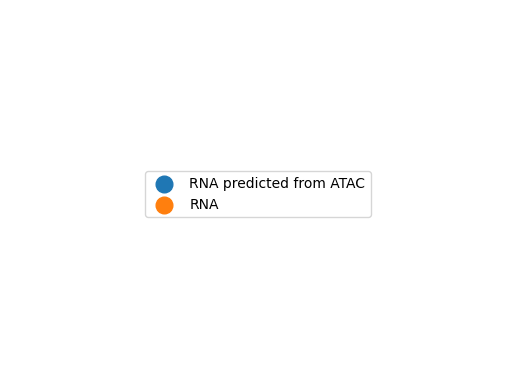

In [6]:
label_params = ax1.get_legend_handles_labels() 

figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=2, bbox_to_anchor=(0.5, 0.5), prop={"size":10})
figl.savefig("legend_rna_atac.svg")

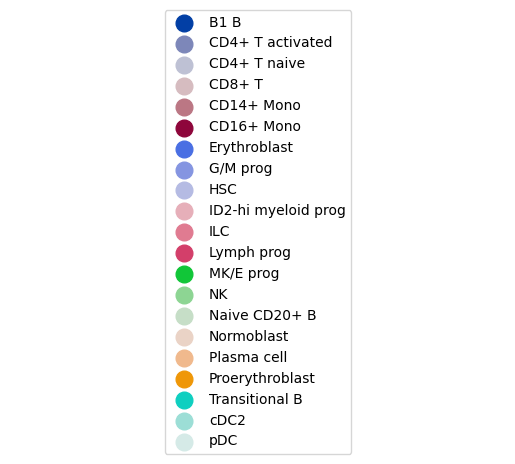

In [7]:
label_params = ax2.get_legend_handles_labels() 

figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=2, bbox_to_anchor=(0.5, 0.5), prop={"size":10})
figl.savefig("legend_cell_types_bone_marrow.svg")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

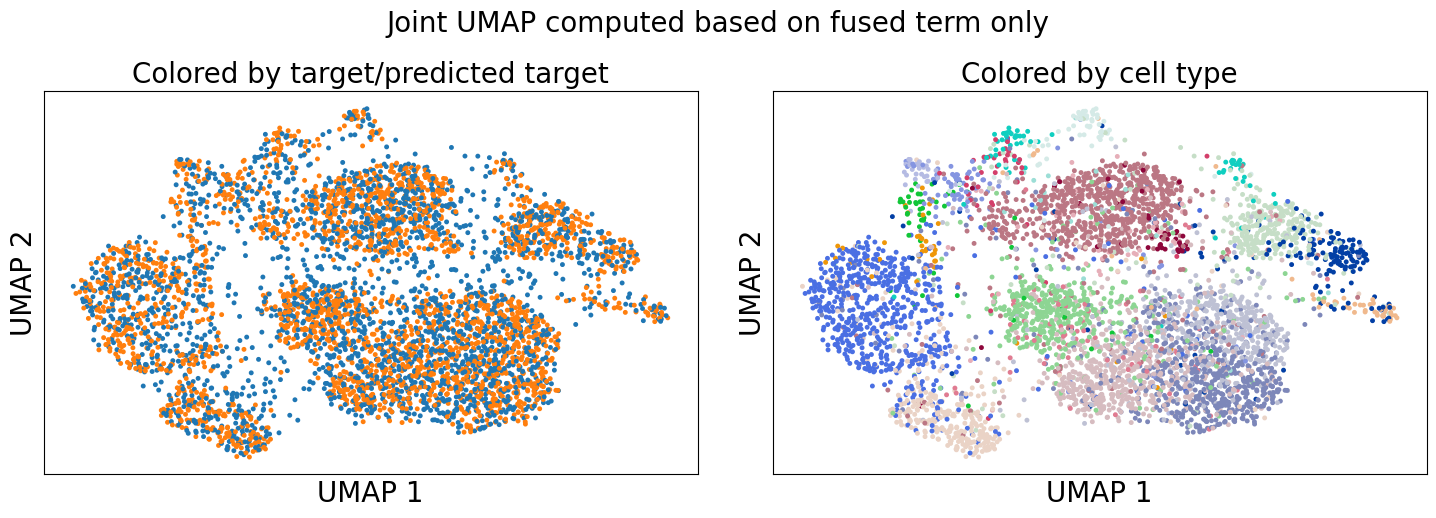

In [8]:
sc.pp.neighbors(adata_one_sample, use_rep="X_translated_1")
sc.tl.umap(adata_one_sample)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Joint UMAP computed based on fused term only", size=20, y=0.9)
sc.pl.umap(adata_one_sample[random_indices,:], color=["batch"], ax=ax1, show=False, size=50, legend_fontsize=10)
ax1.legend()
ax1.set_title("Colored by target/predicted target", fontsize=20)
ax1.set_xlabel('UMAP 1', fontsize=20)
ax1.set_ylabel('UMAP 2', fontsize=20)
sc.pl.umap(adata_one_sample[random_indices,:], color=["cell_type"], ax=ax2, show=False, size=50, legend_fontsize=13)
ax2.set_title("Colored by cell type", fontsize=20)
ax2.set_xlabel('UMAP 1', fontsize=20)
ax2.set_ylabel('UMAP 2', fontsize=20)

ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()
fig.savefig("one_sample_fused.svg")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


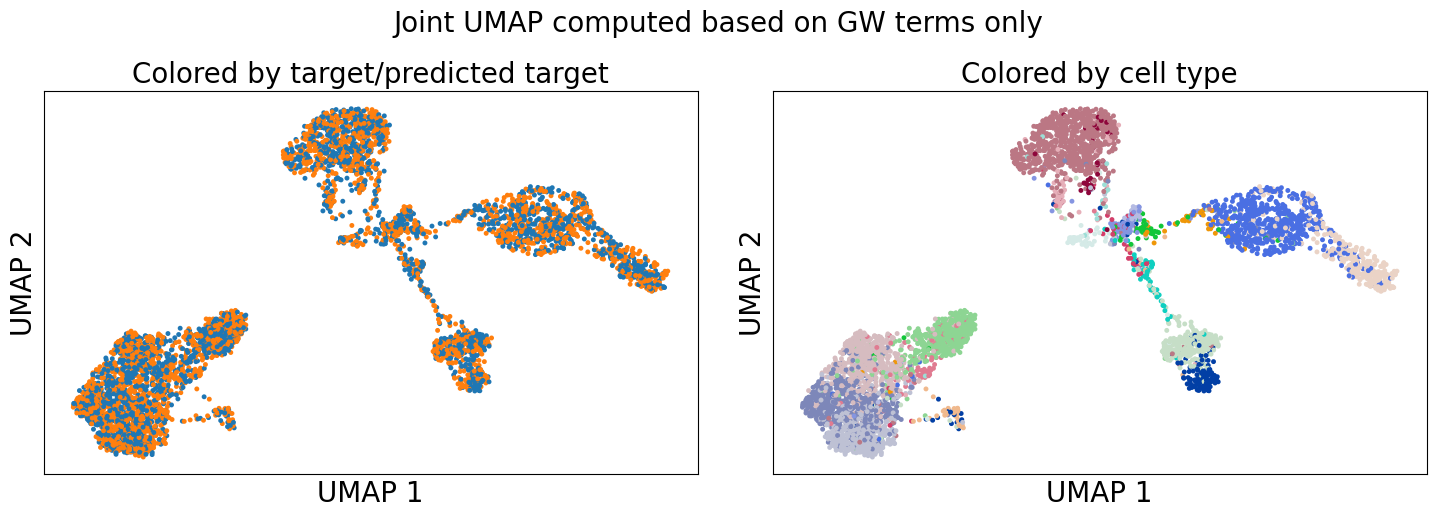

In [9]:
sc.pp.neighbors(adata_one_sample, use_rep="X_translated_2")
sc.tl.umap(adata_one_sample)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Joint UMAP computed based on GW terms only", size=20, y=0.9)
sc.pl.umap(adata_one_sample[random_indices,:], color=["batch"], ax=ax1, show=False, size=50, legend_fontsize=10)
ax1.legend()
ax1.set_title("Colored by target/predicted target", fontsize=20)
ax1.set_xlabel('UMAP 1', fontsize=20)
ax1.set_ylabel('UMAP 2', fontsize=20)
sc.pl.umap(adata_one_sample[random_indices,:], color=["cell_type"], ax=ax2, show=False, size=50, legend_fontsize=13)
ax2.set_title("Colored by cell type", fontsize=20)
ax2.set_xlabel('UMAP 1', fontsize=20)
ax2.set_ylabel('UMAP 2', fontsize=20)

ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()
fig.savefig("one_sample_GW.svg")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


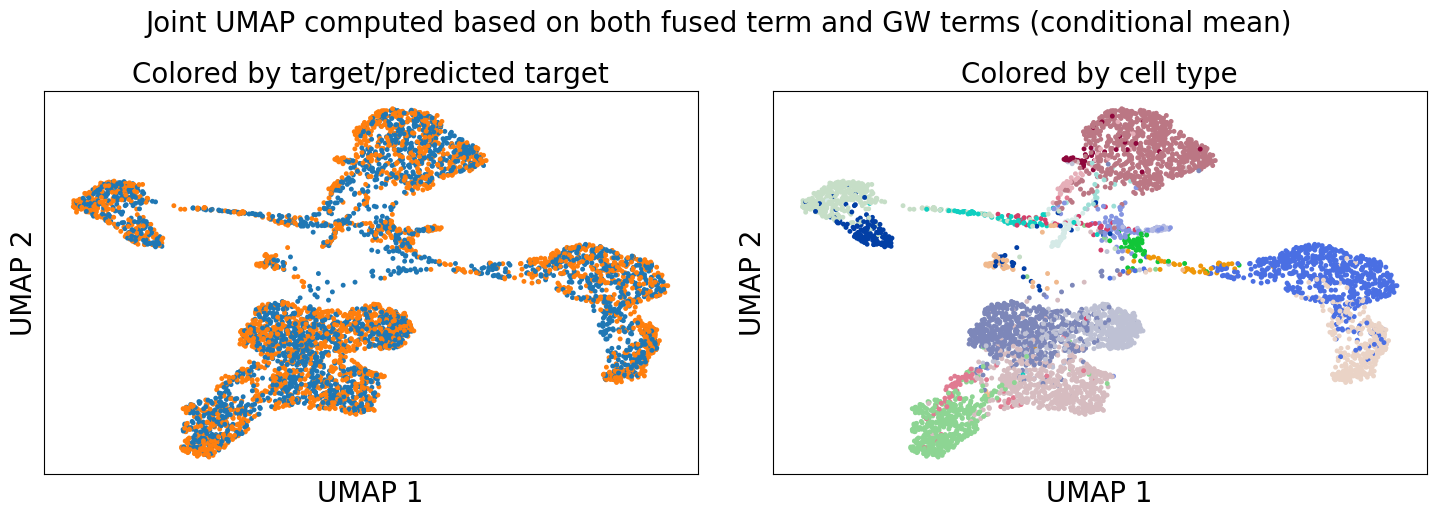

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Joint UMAP computed based on both fused term and GW terms (conditional mean)", size=20, y=0.9)
sc.pl.umap(adata_cond_mean[random_indices,:], color=["batch"], ax=ax1, show=False, size=50, legend_fontsize=10)
ax1.legend()
ax1.set_title("Colored by target/predicted target", fontsize=20)
ax1.set_xlabel('UMAP 1', fontsize=20)
ax1.set_ylabel('UMAP 2', fontsize=20)
sc.pl.umap(adata_cond_mean[random_indices,:], color=["cell_type"], ax=ax2, show=False, size=50, legend_fontsize=13)
ax2.set_title("Colored by cell type", fontsize=20)
ax2.set_xlabel('UMAP 1', fontsize=20)
ax2.set_ylabel('UMAP 2', fontsize=20)

ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()
fig.savefig("cond_mean_both.svg")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


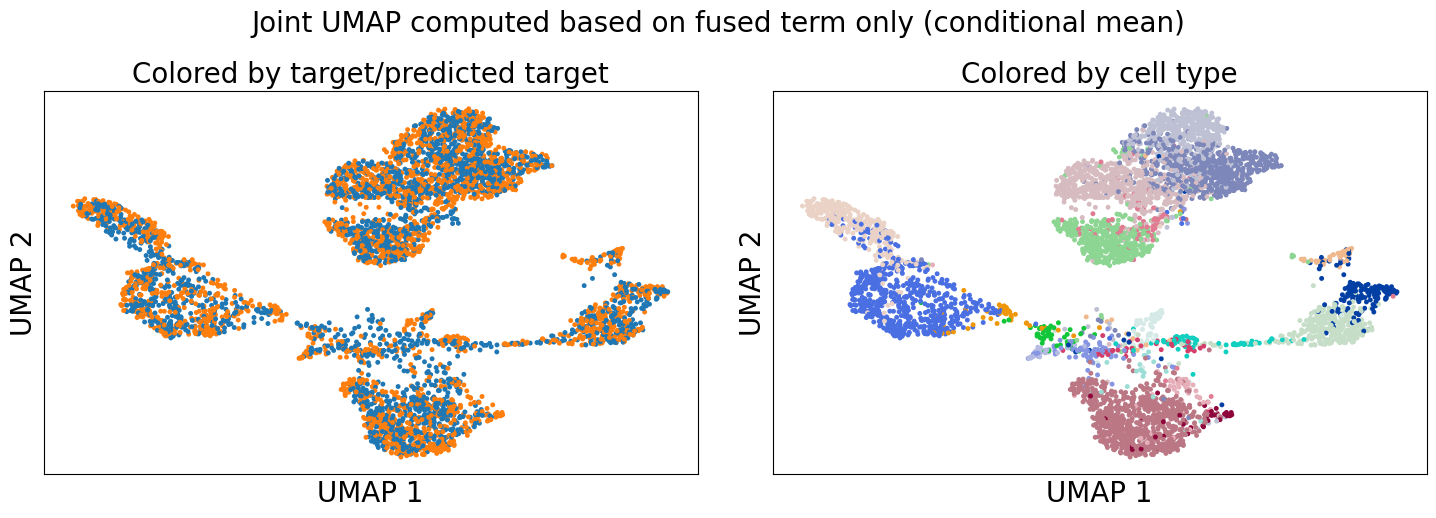

In [11]:
sc.pp.neighbors(adata_cond_mean, use_rep="X_translated_1")
sc.tl.umap(adata_cond_mean)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Joint UMAP computed based on fused term only (conditional mean)", size=20, y=0.9)
sc.pl.umap(adata_cond_mean[random_indices,:], color=["batch"], ax=ax1, show=False, size=50, legend_fontsize=10)
ax1.legend()
ax1.set_title("Colored by target/predicted target", fontsize=20)
ax1.set_xlabel('UMAP 1', fontsize=20)
ax1.set_ylabel('UMAP 2', fontsize=20)
sc.pl.umap(adata_cond_mean[random_indices,:], color=["cell_type"], ax=ax2, show=False, size=50, legend_fontsize=13)
ax2.set_title("Colored by cell type", fontsize=20)
ax2.set_xlabel('UMAP 1', fontsize=20)
ax2.set_ylabel('UMAP 2', fontsize=20)

ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()
fig.savefig("cond_mean_fused.svg")

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


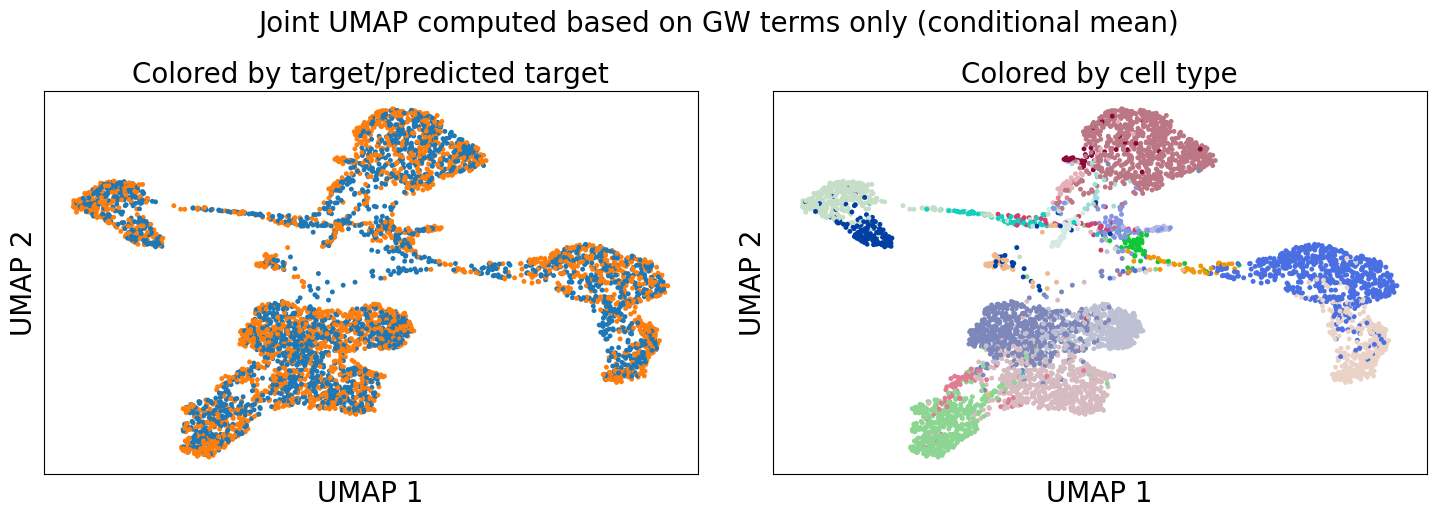

In [12]:
sc.pp.neighbors(adata_cond_mean, use_rep="X_translated_2")
sc.tl.umap(adata_cond_mean)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Joint UMAP computed based on GW terms only (conditional mean)", size=20, y=0.9)
sc.pl.umap(adata_cond_mean[random_indices,:], color=["batch"], ax=ax1, show=False, size=50, legend_fontsize=10)
ax1.legend()
ax1.set_title("Colored by target/predicted target", fontsize=20)
ax1.set_xlabel('UMAP 1', fontsize=20)
ax1.set_ylabel('UMAP 2', fontsize=20)
sc.pl.umap(adata_cond_mean[random_indices,:], color=["cell_type"], ax=ax2, show=False, size=50, legend_fontsize=13)
ax2.set_title("Colored by cell type", fontsize=20)
ax2.set_xlabel('UMAP 1', fontsize=20)
ax2.set_ylabel('UMAP 2', fontsize=20)

ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout(pad=3.0)
plt.show()
fig.savefig("cond_mean_quad.svg")

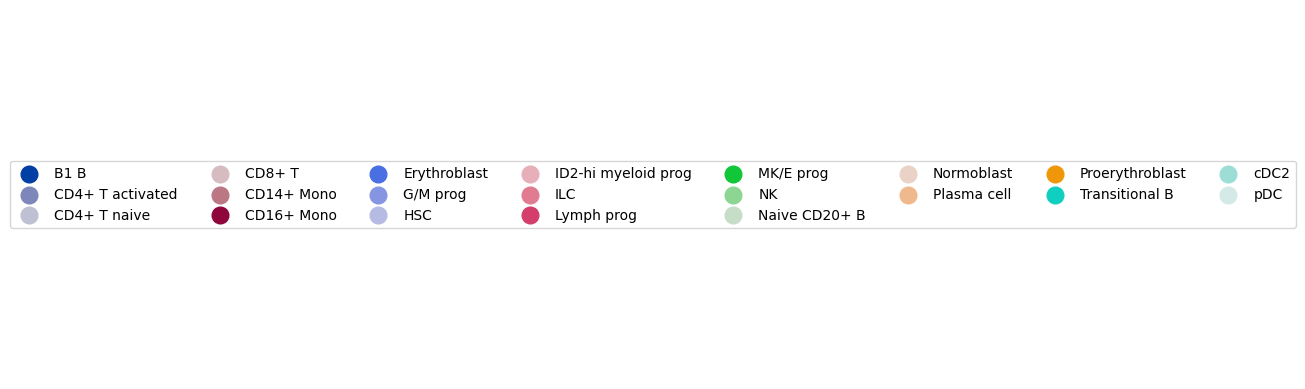

In [17]:
label_params = ax2.get_legend_handles_labels() 

figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=2, bbox_to_anchor=(0.5, 0.5), prop={"size":10}, ncol=8)

In [18]:
figl.savefig("legend_cell_types_bone_marrow_horizontal.svg")